The CSV file includes a hourly/daily summary for Szeged, Hungary area, between 2006 and 2016.

Data available in the hourly response:
<ul>
    <li>time</li>
    <li>summary</li>
    <li>precipType</li>
    <li>temperature</li>
    <li>apparentTemperature</li>
    <li>humidity</li>
    <li>windSpeed</li>
    <li>windBearing</li>
    <li>visibility</li>
    <li>loudCover</li>
    <li>pressure</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
weather = pd.read_csv('weatherHistory.csv')
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [3]:
weather['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

[Text(0, 0, 'Partly Cloudy'),
 Text(0, 0, 'Mostly Cloudy'),
 Text(0, 0, 'Overcast'),
 Text(0, 0, 'Foggy'),
 Text(0, 0, 'Breezy and Mostly Cloudy'),
 Text(0, 0, 'Clear'),
 Text(0, 0, 'Breezy and Partly Cloudy'),
 Text(0, 0, 'Breezy and Overcast'),
 Text(0, 0, 'Humid and Mostly Cloudy'),
 Text(0, 0, 'Humid and Partly Cloudy'),
 Text(0, 0, 'Windy and Foggy'),
 Text(0, 0, 'Windy and Overcast'),
 Text(0, 0, 'Breezy and Foggy'),
 Text(0, 0, 'Windy and Partly Cloudy'),
 Text(0, 0, 'Breezy'),
 Text(0, 0, 'Dry and Partly Cloudy'),
 Text(0, 0, 'Windy and Mostly Cloudy'),
 Text(0, 0, 'Dangerously Windy and Partly Cloudy'),
 Text(0, 0, 'Dry'),
 Text(0, 0, 'Windy'),
 Text(0, 0, 'Humid and Overcast'),
 Text(0, 0, 'Light Rain'),
 Text(0, 0, 'Drizzle'),
 Text(0, 0, 'Windy and Dry'),
 Text(0, 0, 'Dry and Mostly Cloudy'),
 Text(0, 0, 'Breezy and Dry'),
 Text(0, 0, 'Rain')]

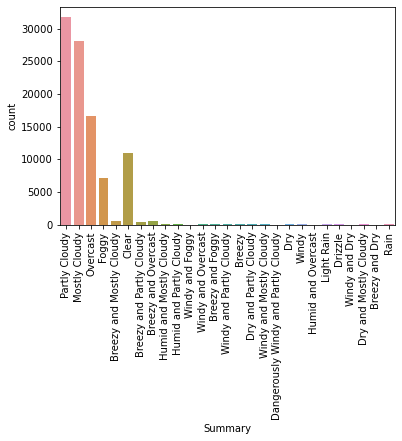

In [4]:
plot = sns.countplot(weather['Summary'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

 Summary column seen to have much data, maybe Precip Type will fit for perfect regression

In [5]:
weather['Precip Type'].unique()

array(['rain', 'snow', nan], dtype=object)

In [6]:
weather.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

[Text(0, 0, 'rain'), Text(0, 0, 'snow')]

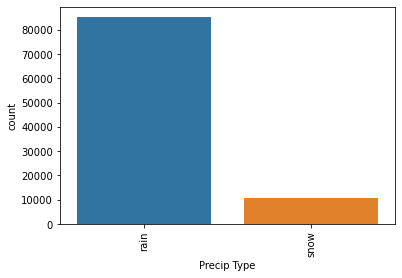

In [7]:
plot = sns.countplot(weather['Precip Type'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

In [8]:
weather['Precip Type'] = weather['Precip Type'].map({'rain': 1, 'snow': 2})
weather['Precip Type'].fillna(0, inplace = True)
weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

[Text(0, 0, '0.0'), Text(0, 0, '1.0'), Text(0, 0, '2.0')]

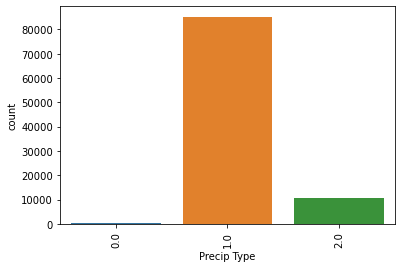

In [9]:
plot = sns.countplot(weather['Precip Type'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

Szeged, Hungary seems to have more rainy days. Lets check for correlation of data.

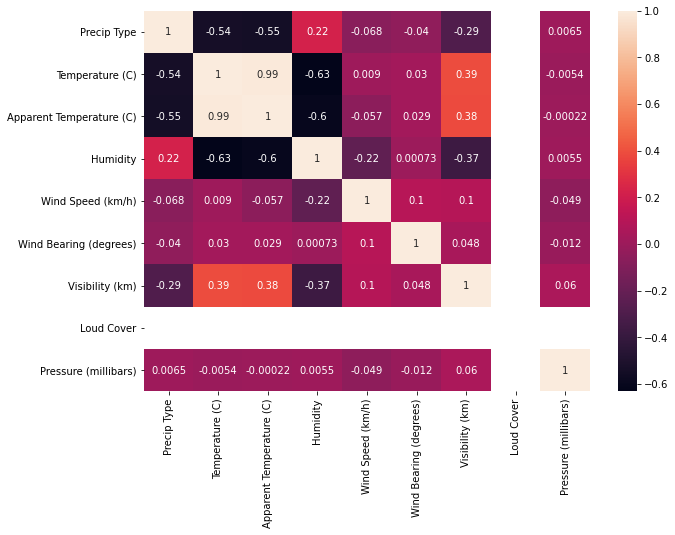

In [10]:
fig, ax = plt.subplots(figsize = (10,7))
sns.heatmap(weather.corr(), annot = True)

Loud Cover does not contain valuable data.

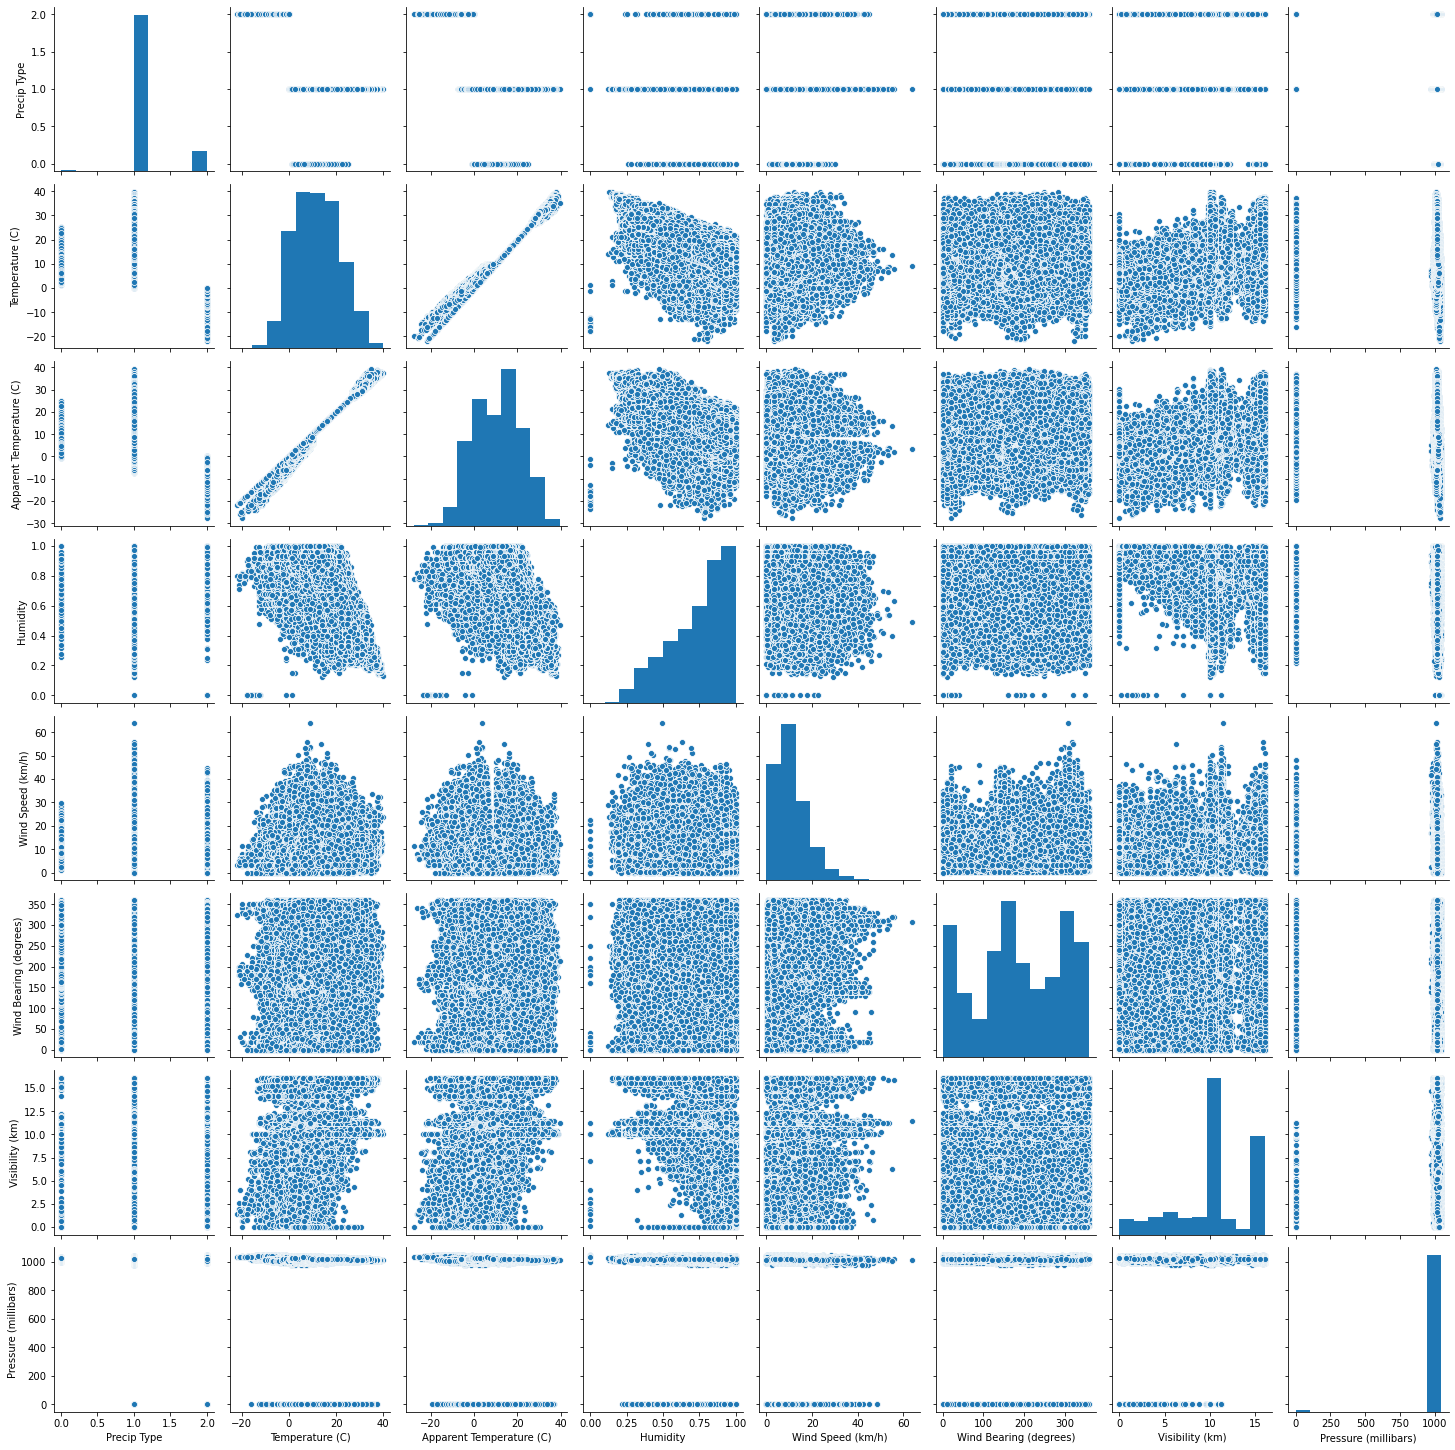

In [11]:
weather = weather.drop(['Loud Cover'], axis = 1)
sns.pairplot(weather)

Correlations between data are pretty bad. Highest one is for temperature and humidity.

# Linear Regression

R Squared (train)= 0.40389984777297805
MAE(train) = 0.12250556228724417
MSE(train) = 0.02303689217791673
R Squared(test) = 0.3711487933430897
MAE(test) = 0.1219744212197824
MSE(test) = 0.022686254992358556


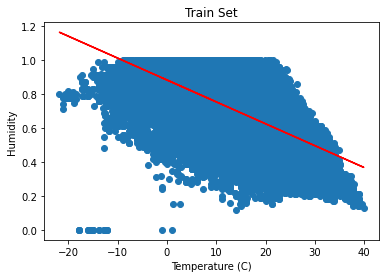

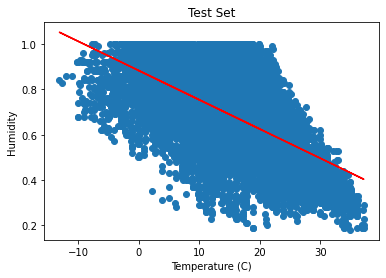

In [12]:
temperature = weather['Temperature (C)']
humidity = weather['Humidity']
temperature = temperature.values.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(temperature, humidity, train_size = 0.8, test_size = 0.2, shuffle = False)
linm = LinearRegression()
linm.fit(x_train, y_train)
print ('R Squared (train)=',r2_score(y_train, linm.predict(x_train)))
print ('MAE(train) =',mean_absolute_error(y_train, linm.predict(x_train)))
print ('MSE(train) =',mean_squared_error(y_train, linm.predict(x_train)))

print ('R Squared(test) =',r2_score(y_test, linm.predict(x_test)))
print ('MAE(test) =',mean_absolute_error(y_test, linm.predict(x_test)))
print ('MSE(test) =',mean_squared_error(y_test, linm.predict(x_test)))

plt.scatter(x_train, y_train)
plt.plot(x_train, linm.predict(x_train), color = 'red')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title(f'Train Set')
plt.show()
plt.clf()
plt.scatter(x_test, y_test)
plt.plot(x_test, linm.predict(x_test), color = 'red')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title(f'Test Set')
plt.show()

Error in the predicted value seems preety low. Test data prediction have less error than train data prediction.

# Polynomial Regression

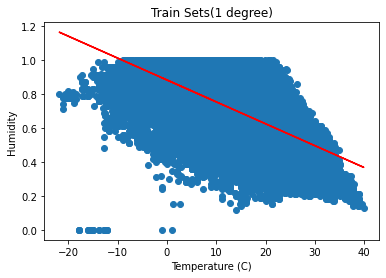

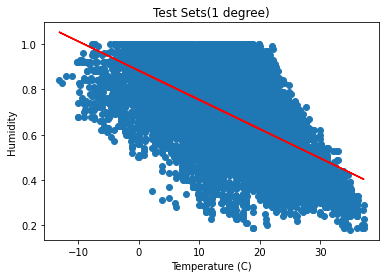

R Squared (train)= 0.40389984777297805
MAE(train) = 0.12250556228724414
MSE(train) = 0.023036892177916726 

R Squared(test) = 0.37114879334309003
MAE(test) = 0.12197442121978236
MSE(test) = 0.022686254992358545


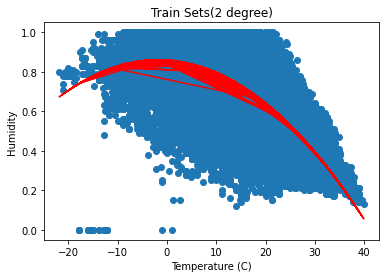

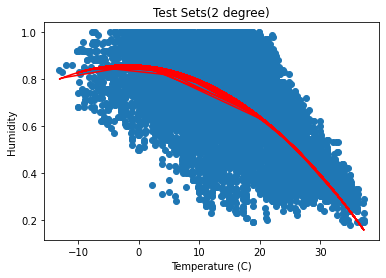

R Squared (train)= 0.4733731076129062
MAE(train) = 0.11286155165071877
MSE(train) = 0.02035202791441744 

R Squared(test) = 0.43514347450884194
MAE(test) = 0.11446447817416153
MSE(test) = 0.02037760130812858


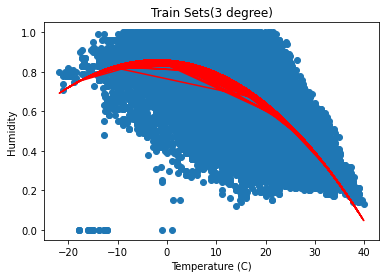

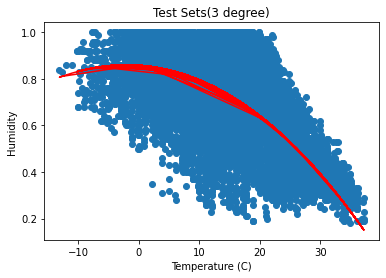

R Squared (train)= 0.47339433249464624
MAE(train) = 0.1128748276864308
MSE(train) = 0.020351207657434936 

R Squared(test) = 0.43530605449456006
MAE(test) = 0.11451086217605008
MSE(test) = 0.02037173611939457


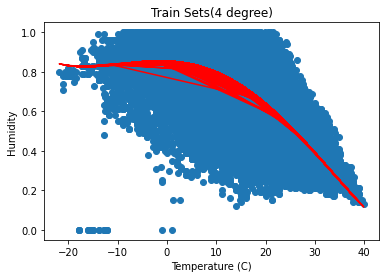

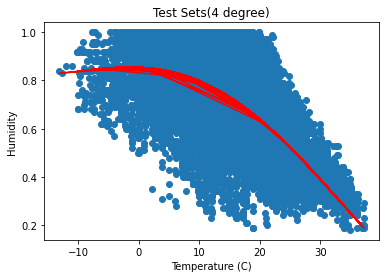

R Squared (train)= 0.4739408351878416
MAE(train) = 0.11258383426106679
MSE(train) = 0.020330087509132597 

R Squared(test) = 0.4352217864293504
MAE(test) = 0.11443789906389552
MSE(test) = 0.02037477614984187


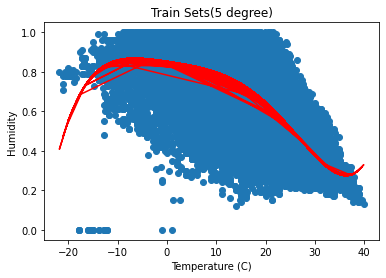

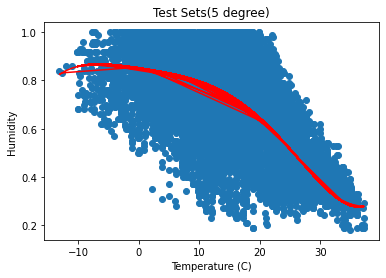

R Squared (train)= 0.4767495168100303
MAE(train) = 0.11230164484602304
MSE(train) = 0.020221543172328243 

R Squared(test) = 0.4385902429602184
MAE(test) = 0.11435775430045235
MSE(test) = 0.02025325668230964


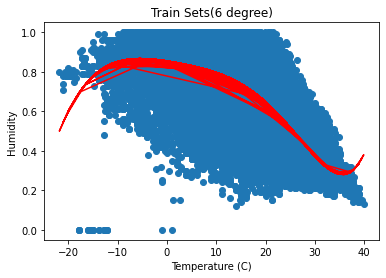

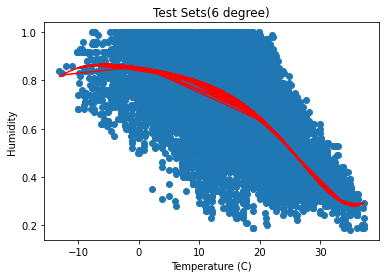

R Squared (train)= 0.4768483843002942
MAE(train) = 0.11232501650584027
MSE(train) = 0.020217722338354956 

R Squared(test) = 0.43951145759482135
MAE(test) = 0.11425124711459286
MSE(test) = 0.020220023208505244


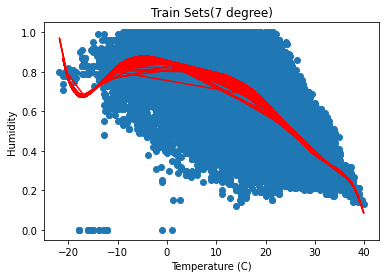

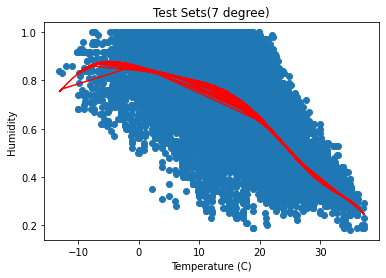

R Squared (train)= 0.4790841157623309
MAE(train) = 0.11201664930847315
MSE(train) = 0.02013132023891362 

R Squared(test) = 0.44172016911252987
MAE(test) = 0.1139909646186958
MSE(test) = 0.020140342368006145


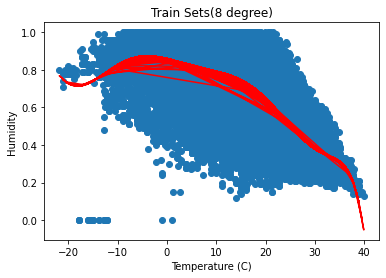

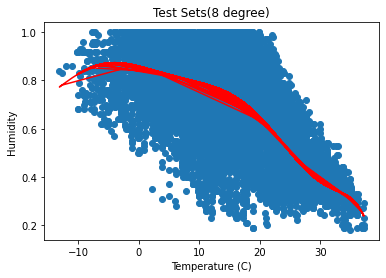

R Squared (train)= 0.4794072454423225
MAE(train) = 0.11197586086556367
MSE(train) = 0.020118832566213583 

R Squared(test) = 0.44440098018656304
MAE(test) = 0.11363267849910043
MSE(test) = 0.020043630199900162


In [13]:
 def pol(deg):
        pModel = PolynomialFeatures(degree = deg)
        x_val = pModel.fit_transform(x_train)
        
        lModel = LinearRegression()
        lModel.fit(x_val, y_train)
        predict_train = lModel.predict(pModel.fit_transform(x_train))
        predict_test = lModel.predict(pModel.fit_transform(x_test))
        plt.scatter(x_train, y_train)
        plt.plot(x_train, predict_train, color = 'red')
        plt.xlabel('Temperature (C)')
        plt.ylabel('Humidity')
        plt.title(f'Train Sets({deg} degree)')
        plt.show()
        plt.clf()
        plt.scatter(x_test, y_test)
        plt.plot(x_test, predict_test, color= 'red')
        plt.xlabel('Temperature (C)')
        plt.ylabel('Humidity')
        plt.title(f'Test Sets({deg} degree)')
        plt.show()
        
        
    
        print('R Squared (train)=',r2_score(y_train, lModel.predict(pModel.fit_transform(x_train))))
        print('MAE(train) =',mean_absolute_error(y_train, lModel.predict(pModel.fit_transform(x_train))))
        print('MSE(train) =',mean_squared_error(y_train, lModel.predict(pModel.fit_transform(x_train))), '\n')
        
       
        print('R Squared(test) =',r2_score(y_test, lModel.predict(pModel.fit_transform(x_test)) ))
        print('MAE(test) =',mean_absolute_error(y_test, lModel.predict(pModel.fit_transform(x_test)) ))
        print('MSE(test) =',mean_squared_error(y_test, lModel.predict(pModel.fit_transform(x_test)) ))
for i in range(1, 9):
    pol(i)

Predictions are preety inaccurate. Accuaracy is arround 47% in train data prediction and 44% in test data prediction.

# Decision Tree

In [14]:
# Deciesion Tree
tree  = DecisionTreeRegressor(random_state = 42, max_depth = 10)
tree.fit(x_train, y_train)

print('R Squared (train)=',r2_score(y_train, tree.predict(x_train)))
print('MAE(train) =',mean_absolute_error(y_train, tree.predict(x_train)))
print('MSE(train) =',mean_squared_error(y_train, tree.predict(x_train)), '\n')


print('R Squared (train)=',r2_score(y_test, tree.predict(x_test)))
print('MAE(train) =',mean_absolute_error(y_test, tree.predict(x_test)))
print('MSE(train) =',mean_squared_error(y_test, tree.predict(x_test)), '\n')

R Squared (train)= 0.5183976132945942
MAE(train) = 0.10724922163870716
MSE(train) = 0.018612010437693116 

R Squared (train)= 0.4639443725006954
MAE(train) = 0.11057235287608547
MSE(train) = 0.01933858840820014 



Accuaracy are preety good than in polynomial regression.

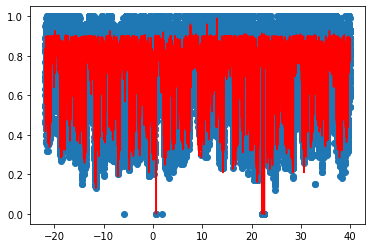

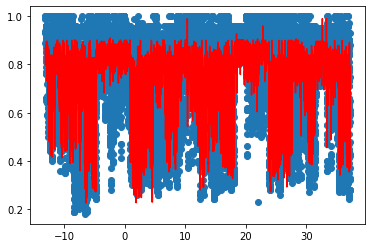

In [15]:
x_train_grid = np.linspace(min(x_train), max(x_train), len(y_train)) 
x_train_grid = x_train_grid.reshape((len(x_train_grid), 1))

x_test_grid = np.linspace(min(x_test), max(x_test), len(y_test)) 
x_test_grid = x_test_grid.reshape((len(x_test_grid), 1))

plt.scatter(x_train_grid, y_train)
plt.plot(x_train_grid, tree.predict(x_train), color = 'red')
plt.show()

plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, tree.predict(x_test), color = 'red')
plt.show()

Graph seems preety good.

# Random Forest Regression

In [16]:
forest = RandomForestRegressor(n_estimators = 500,max_depth = 11, random_state = 0)
forest.fit(x_train, y_train)


print('R Squared (train)=',r2_score(y_train, forest.predict(x_train)))
print('MAE(train) =',mean_absolute_error(y_train, forest.predict(x_train)))
print('MSE(train) =',mean_squared_error(y_train, forest.predict(x_train)), '\n')


print('R Squared (train)=',r2_score(y_test, forest.predict(x_test)))
print('MAE(train) =',mean_absolute_error(y_test, forest.predict(x_test)))
print('MSE(train) =',mean_squared_error(y_test, forest.predict(x_test)), '\n')

R Squared (train)= 0.5290830123449147
MAE(train) = 0.10614599270115473
MSE(train) = 0.01819906240390953 

R Squared (train)= 0.4715558656634633
MAE(train) = 0.10998355316689985
MSE(train) = 0.01906399837333144 



Accuaracy are almost same so are the errors.

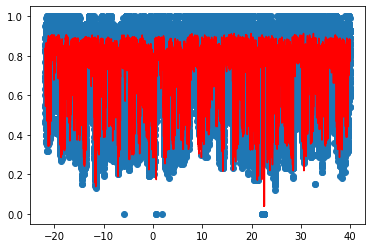

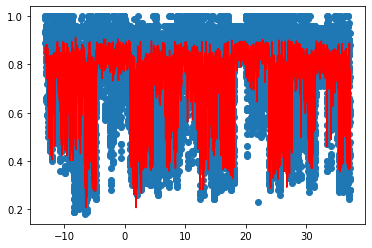

In [17]:
plt.scatter(x_train_grid, y_train)
plt.plot(x_train_grid, forest.predict(x_train), color = 'red')
plt.show()

plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, forest.predict(x_test), color = 'red')
plt.show()

# Bagging Model

In [18]:
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators = 500)
baggingModel.fit(x_train, y_train)

print('R Squared (train)=',r2_score(y_train, baggingModel.predict(x_train)))
print('MAE(train) =',mean_absolute_error(y_train, baggingModel.predict(x_train)))
print('MSE(train) =',mean_squared_error(y_train, baggingModel.predict(x_train)), '\n')


print('R Squared (train)=',r2_score(y_test, baggingModel.predict(x_test)))
print('MAE(train) =',mean_absolute_error(y_test, baggingModel.predict(x_test)))
print('MSE(train) =',mean_squared_error(y_test, baggingModel.predict(x_test)), '\n')

R Squared (train)= 0.5526495803970262
MAE(train) = 0.10237142731039416
MSE(train) = 0.01728830858982014 

R Squared (train)= 0.4447925716517258
MAE(train) = 0.11236241555167298
MSE(train) = 0.020029503258999878 



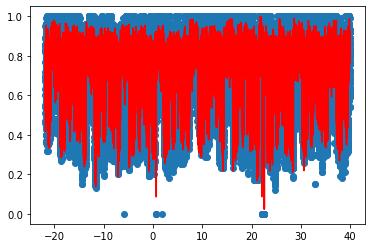

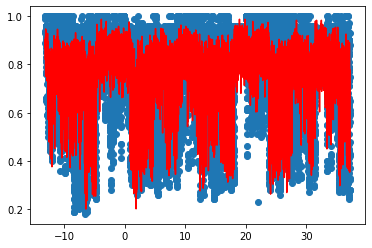

In [19]:
plt.scatter(x_train_grid, y_train)
plt.plot(x_train_grid, baggingModel.predict(x_train), color = 'red')
plt.show()

plt.scatter(x_test_grid, y_test)
plt.plot(x_test_grid, baggingModel.predict(x_test), color = 'red')
plt.show()

# Multiple linear Regression

Multiple regression for analysing Precipitaion Type from Temperatures, humidity and visibility.

In [20]:
features = weather[['Temperature (C)', 'Apparent Temperature (C)',  'Visibility (km)']]
labels = weather['Humidity']

In [21]:
xm_train, xm_test, ym_train, ym_test = train_test_split(features, labels, test_size = 0.2)

linMod = LinearRegression()
linMod.fit(xm_train, ym_train)
print(linMod.coef_)

print ('R Squared (train)=',r2_score(ym_train, linMod.predict(xm_train)))
print ('MAE(train) =',mean_absolute_error(ym_train, linMod.predict(xm_train)))
print ('MSE(train) =',mean_squared_error(ym_train, linMod.predict(xm_train)))


print ('R Squared(test) =',r2_score(ym_test, linMod.predict(xm_test)))
print ('MAE(test) =',mean_absolute_error(ym_test, linMod.predict(xm_test)))
print ('MSE(test) =',mean_squared_error(ym_test, linMod.predict(xm_test)))

[-0.0449036   0.02966367 -0.00594793]
R Squared (train)= 0.45475437530449636
MAE(train) = 0.11523144210771866
MSE(train) = 0.02087000823942851
R Squared(test) = 0.46062592525775814
MAE(test) = 0.11408219197516405
MSE(test) = 0.020462995348259305


Accuracy is lower, lets do decision tree.

In [22]:
tree  = DecisionTreeRegressor(random_state = 42, max_depth = 5)
tree.fit(xm_train, ym_train)

print ('R Squared (train)=',r2_score(ym_train, tree.predict(xm_train)))
print ('MAE(train) =',mean_absolute_error(ym_train, tree.predict(xm_train)))
print ('MSE(train) =',mean_squared_error(ym_train, tree.predict(xm_train)))


print ('R Squared(test) =',r2_score(ym_test, tree.predict(xm_test)))
print ('MAE(test) =',mean_absolute_error(ym_test, tree.predict(xm_test)))
print ('MSE(test) =',mean_squared_error(ym_test, tree.predict(xm_test)))

R Squared (train)= 0.6061315159925886
MAE(train) = 0.09200027331426006
MSE(train) = 0.01507584496634234
R Squared(test) = 0.6098953132756118
MAE(test) = 0.09135434368534225
MSE(test) = 0.014799951950953738


The accuracy is better in with more features.

In [23]:
forest = RandomForestRegressor(n_estimators = 500,max_depth = 5, random_state = 0)
forest.fit(xm_train, ym_train)


print ('R Squared (train)=',r2_score(ym_train, forest.predict(xm_train)))
print ('MAE(train) =',mean_absolute_error(ym_train, forest.predict(xm_train)))
print ('MSE(train) =',mean_squared_error(ym_train, forest.predict(xm_train)))

print ('R Squared(test) =',r2_score(ym_test, forest.predict(xm_test)))
print ('MAE(test) =',mean_absolute_error(ym_test, forest.predict(xm_test)))
print ('MSE(test) =',mean_squared_error(ym_test, forest.predict(xm_test)))

R Squared (train)= 0.6193346934132375
MAE(train) = 0.09061588288367822
MSE(train) = 0.014570475626222532
R Squared(test) = 0.625011816710949
MAE(test) = 0.08964511106873696
MSE(test) = 0.01422645583023812


In [24]:
baggingModel = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators = 500)
baggingModel.fit(xm_train, ym_train)


print ('R Squared (train)=',r2_score(ym_train, baggingModel.predict(xm_train)))
print ('MAE(train) =',mean_absolute_error(ym_train, baggingModel.predict(xm_train)))
print ('MSE(train) =',mean_squared_error(ym_train, baggingModel.predict(xm_train)))

print ('R Squared(test) =',r2_score(ym_test, baggingModel.predict(xm_test)))
print ('MAE(test) =',mean_absolute_error(ym_test, baggingModel.predict(xm_test)))
print ('MSE(test) =',mean_squared_error(ym_test, baggingModel.predict(xm_test)))

R Squared (train)= 0.8559291499326203
MAE(train) = 0.04673425610451788
MSE(train) = 0.005514505191393021
R Squared(test) = 0.6276563964756434
MAE(test) = 0.08467892180656038
MSE(test) = 0.014126124676114883


# Conclusion
For the temperature and humidity, the model gives an accuracy of almost 55% for train data and 45% for test data. First of all the correlations were bad in first place, but model predicted more than half of time. Error came low. 
Prediction of Humidity's accuracy rises somewhat on adding the features.